### Importación de datos



In [16]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111


In [3]:
lista_tiendas = [ # crear una lista de tuplas con las tiendas para modularizar el código más tarde
    ('Tienda N°1', tienda),
    ('Tienda N°2', tienda2),
    ('Tienda N°3', tienda3),
    ('Tienda N°4', tienda4)
]

tiendas_con_mejor_desempeño = {} # crear un diccionario para almacenar las tiendas con mejor desempeño
tiendas_con_peor_desempeño = {} # crear un diccionario para almacenar las tiendas con peor desempeño

# 1. Análisis de facturación



In [14]:
# calcular la suma de la columna Precio de las tiendas
def calcular_facturacion(lista_tiendas):
    facturaciones = {}  # Inicializar el diccionario dentro de la función
    for numero_de_tienda, tienda_df in lista_tiendas:  # recorrer cada tupla (nombre, DataFrame)
        facturaciones[numero_de_tienda] = tienda_df['Precio'].sum() # seleccionar la tienda y calcular la suma de la columna precio
    return facturaciones # devolver el diccionario

facturacion_por_tiendas = calcular_facturacion(lista_tiendas) # llamar a la función y guardar el resultado en una variable

# determinar mayor y menor facturación
mayor_facturacion = max(facturacion_por_tiendas, key=facturacion_por_tiendas.get)
menor_facturacion = min(facturacion_por_tiendas, key=facturacion_por_tiendas.get)

# agregar los mejores y peores resultados al diccionario
tiendas_con_mejor_desempeño['Mayor facturación'] = mayor_facturacion
tiendas_con_peor_desempeño['Menor facturación'] = menor_facturacion

# mostrar el total por tienda
for numero_tienda, total in facturacion_por_tiendas.items(): 
    print(f"facturación total de la {numero_tienda}: {total:,.2f}")

# imprimir resultados
print(f'\nLa tienda con mayor facturación es la {mayor_facturacion} con un total de {facturacion_por_tiendas[mayor_facturacion]:,.2f}.')
print(f'La tienda con menor facturación es la {menor_facturacion} con un total de {facturacion_por_tiendas[menor_facturacion]:,.2f}.')

facturación total de la Tienda N°1: 1,150,880,400.00
facturación total de la Tienda N°2: 1,116,343,500.00
facturación total de la Tienda N°3: 1,098,019,600.00
facturación total de la Tienda N°4: 1,038,375,700.00

La tienda con mayor facturación es la Tienda N°1 con un total de 1,150,880,400.00.
La tienda con menor facturación es la Tienda N°4 con un total de 1,038,375,700.00.


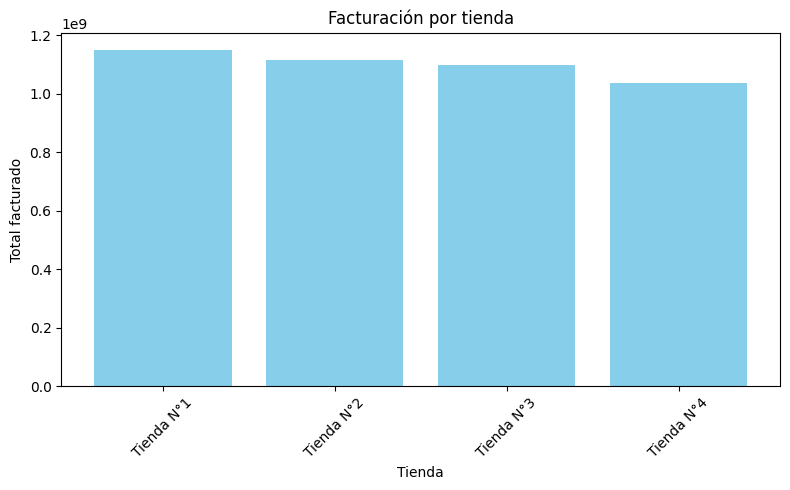

In [17]:
# Datos
nombres_tiendas = list(facturacion_por_tiendas.keys())
totales = list(facturacion_por_tiendas.values())

# Crear gráfico
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, totales, color='skyblue')
plt.title('Facturación por tienda')
plt.xlabel('Tienda')
plt.ylabel('Total facturado')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()

# 2. Ventas por categoría

In [5]:
ventas_por_tienda_y_categoria = {} # crear un diccionario para guardar la cantidad de productos vendidos por categoría en cada tienda para evaluar posteriormente
ventas_totales_por_tienda = {} # usar un diccioario para almacenar las ventas totales de cada tienda para evaluar mas tarde
productos_mas_populares = {} # usar un diccionaro para almacenar la categoría más popular de cada tienda

productos_vendidos_tienda_uno = tienda.groupby('Categoría del Producto').size() # calcular el número de productos vendidos por categoría en la tienda 1
productos_mas_populares['Tienda N°1'] = productos_vendidos_tienda_uno.idxmax() # usar la función idxmax() para obtener el índice del producto más popular
ventas_por_tienda_y_categoria['Tienda N°1'] = productos_vendidos_tienda_uno # guardar el resultado en el diccionario

productos_vendidos_tienda_dos = tienda2.groupby('Categoría del Producto').size()
productos_mas_populares['Tienda N°2'] = productos_vendidos_tienda_dos.idxmax()
ventas_por_tienda_y_categoria['Tienda N°2'] = productos_vendidos_tienda_dos

productos_vendidos_tienda_tres = tienda3.groupby('Categoría del Producto').size()
productos_mas_populares['Tienda N°3'] = productos_vendidos_tienda_tres.idxmax()
ventas_por_tienda_y_categoria['Tienda N°3'] = productos_vendidos_tienda_tres

productos_vendidos_tienda_cuatro = tienda4.groupby('Categoría del Producto').size()
productos_mas_populares['Tienda N°4'] = productos_vendidos_tienda_cuatro.idxmax()
ventas_por_tienda_y_categoria['Tienda N°4'] = productos_vendidos_tienda_cuatro 

contador = 1 # declarar un contador para generar un índice para numerar las tiendas dentro del diccionario 
for productos_vendido in ventas_por_tienda_y_categoria.values(): # iterar solo sobre los valores del diccionario
    ventas_totales_por_tienda[f'Tienda N°{contador}'] = productos_vendido.sum()
    contador += 1 # incrementar el contador para generar el índice de las tiendas

for tienda_categoria, categoria in productos_mas_populares.items():
    print(f'La categoría más popular de la {tienda_categoria} fue: {categoria}')

La categoría más popular de la Tienda N°1 fue: Muebles
La categoría más popular de la Tienda N°2 fue: Muebles
La categoría más popular de la Tienda N°3 fue: Muebles
La categoría más popular de la Tienda N°4 fue: Muebles


In [23]:
# calcular las ventas por tienda y por categoría
def ventas_por_tienda(lista_tiendas):
    ventas_por_tienda_y_categoria = {}
    
    for numero_de_tienda, tienda_df in lista_tiendas: # recorrer cada tupla (nombre, DataFrame)
        productos_vendidos = tienda_df.groupby('Categoría del Producto').size() # agrupar por la categoria del producto y calcular el tamaño del grupo
        ventas_por_tienda_y_categoria[numero_de_tienda] = productos_vendidos # añadir el resultado al diccionario
    return ventas_por_tienda_y_categoria

# calcular el producto más y menos vendido por tienda
def productos_populares_por_tienda(lista_tiendas):
    productos_populares = {}

    for numero_de_tienda, tienda_df in lista_tiendas:
        
        conteo_productos = tienda_df['Categoría del Producto'].value_counts()
        mas_vendido = conteo_productos.idxmax()
        menos_vendido = conteo_productos.idxmin()
        
        productos_populares[numero_de_tienda] = {
            'Más vendido': mas_vendido,
            'Menos vendido': menos_vendido
        }
    return productos_populares

productos_populares = productos_populares_por_tienda(lista_tiendas)

# mostrar resultados
for tienda, productos in productos_populares.items():
    print(f'\n{tienda}:')
    print(f"  Producto más vendido: {productos['Más vendido']}")
    print(f"  Producto menos vendido: {productos['Menos vendido']}")
    

ventas_por_tienda_y_categoria = ventas_por_tienda(lista_tiendas) # llamar a la función y guardar el resultado en una variable



Tienda N°1:
  Producto más vendido: Muebles
  Producto menos vendido: Artículos para el hogar

Tienda N°2:
  Producto más vendido: Muebles
  Producto menos vendido: Artículos para el hogar

Tienda N°3:
  Producto más vendido: Muebles
  Producto menos vendido: Instrumentos musicales

Tienda N°4:
  Producto más vendido: Muebles
  Producto menos vendido: Instrumentos musicales


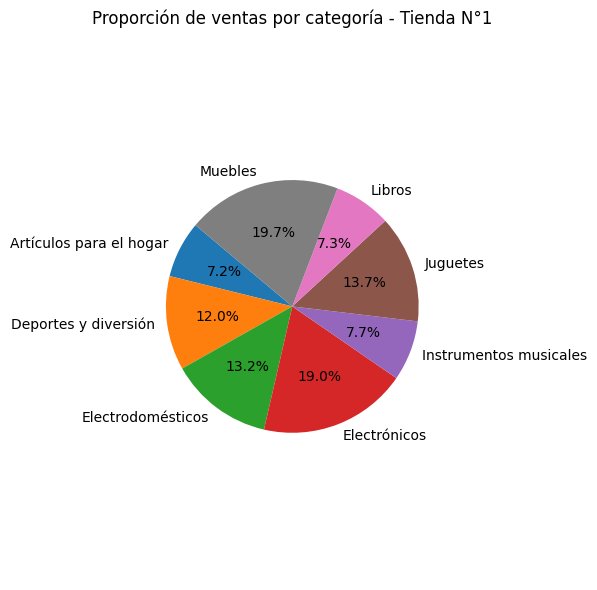

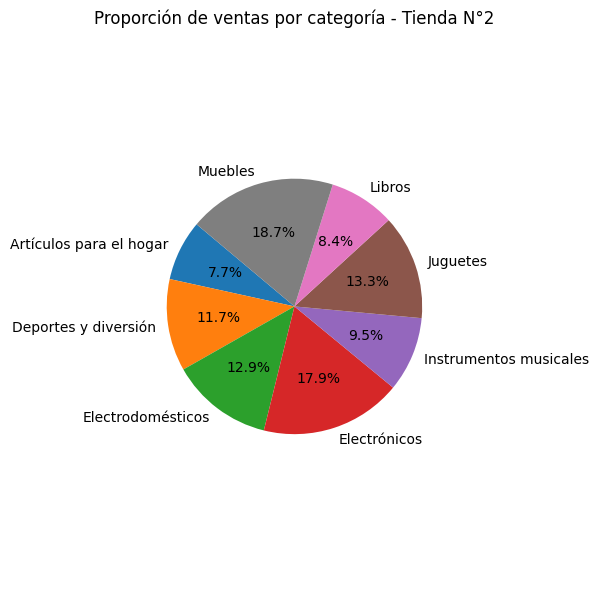

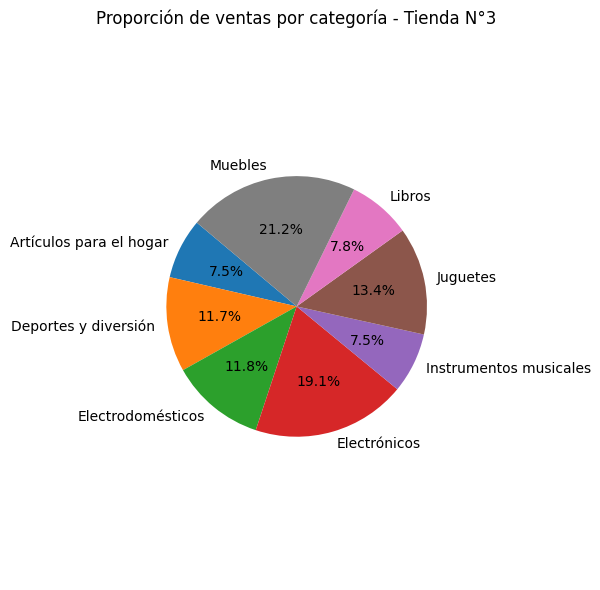

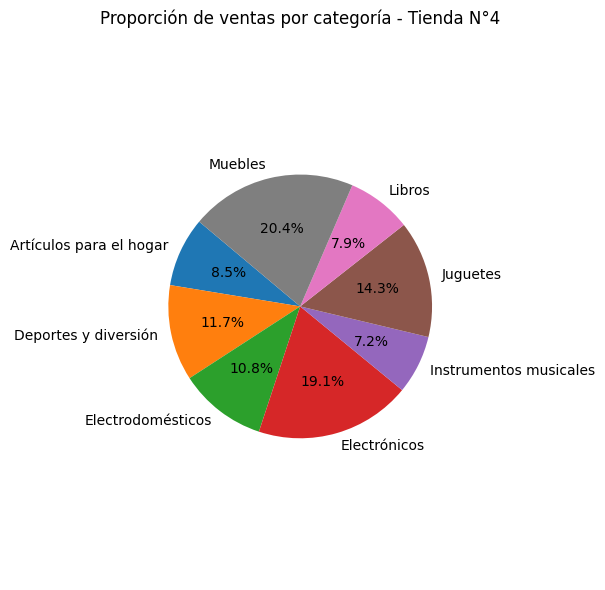

In [ ]:
for tienda, ventas_categoria in ventas_por_tienda_y_categoria.items(): # usar un ciclo for para generar graficos para todas las tiendas
    plt.figure(figsize=(6, 6))  # Tamaño del gráfico
    plt.pie(ventas_categoria, labels=ventas_categoria.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Proporción de ventas por categoría - {tienda}')
    plt.axis('equal')  # Para que el gráfico se vea circular
    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda


In [7]:
calificaciones_de_tiendas = {} # crear un diccionario para almacenar las calificaciones de cada tienda

calificaciones_de_tiendas['Tienda N°1'] = round((tienda['Calificación'].mean()), 2) #usar el metodo mean() para calcular la calificación promedio de la tienda, usar el metodo round() para redondear el resultado a 1 decimal
calificaciones_de_tiendas['Tienda N°2'] = round((tienda2['Calificación'].mean()), 2)
calificaciones_de_tiendas['Tienda N°3'] = round((tienda3['Calificación'].mean()), 2)
calificaciones_de_tiendas['Tienda N°4'] = round((tienda4['Calificación'].mean()), 2)

mayor_calificacion = max(calificaciones_de_tiendas, key=calificaciones_de_tiendas.get) # usar la función max() para calcular la tienda con mayor calificación
menor_calificacion = min(calificaciones_de_tiendas, key=calificaciones_de_tiendas.get) # usar la función min() para calcular la tienda con menor calificación

tiendas_con_mejor_desempeño['Mayor calificación'] = mayor_calificacion # agregar la tienda con mayor calificación al diccionario de tiendas con mejor desempeño
tiendas_con_peor_desempeño['Menor calificación'] = menor_calificacion # agregar la tienda con menor calificación al diccionario de tiendas con peor desempeño

print('Calificaciones promedio de las tiendas: \n')

for n_tienda, calificacion_tienda in calificaciones_de_tiendas.items():
    print(f'La calificación de la {n_tienda} es: {calificacion_tienda}') # iterar sobre el diccionario para imprimir la calificación de cada tienda

print(f'\nSiendo la tienda con mayor calificación la {mayor_calificacion} con una calificación de {calificaciones_de_tiendas[mayor_calificacion]}') 
print(f'y siendo la tienda con menor calificación la {menor_calificacion} con una calificación de {calificaciones_de_tiendas[menor_calificacion]}') 


Calificaciones promedio de las tiendas: 

La calificación de la Tienda N°1 es: 3.98
La calificación de la Tienda N°2 es: 4.04
La calificación de la Tienda N°3 es: 4.05
La calificación de la Tienda N°4 es: 4.0

Siendo la tienda con mayor calificación la Tienda N°3 con una calificación de 4.05
y siendo la tienda con menor calificación la Tienda N°1 con una calificación de 3.98


In [ ]:
# Grafico de barras 

# 4. Productos más y menos vendidos

In [9]:
productos_populares = {} # crear un diccionario para almacenar los resultados

for nombre, df in lista_tiendas: # iterar sobre la lista de tiendas
    ventas_por_producto = df.groupby('Categoría del Producto').size() # agrupar por la categoría del producto y contar el número de ventas
    mas_vendido = ventas_por_producto.idxmax() # usar la función idxmax() para obtener el índice del producto más vendido
    menos_vendido = ventas_por_producto.idxmin() # usar la función idxmin() para obtener el índice del producto menos vendido
    productos_populares[nombre] = {
        'Más vendido': mas_vendido,
        'Menos vendido': menos_vendido
    }

for index_tienda, producto in productos_populares.items(): # iterar sobre el diccionario para mostrar los resultados
    print(f"{index_tienda}:")
    print(f" - Producto más vendido: {producto['Más vendido']}")
    print(f" - Producto menos vendido: {producto['Menos vendido']}\n")

Tienda N°1:
 - Producto más vendido: Muebles
 - Producto menos vendido: Artículos para el hogar

Tienda N°2:
 - Producto más vendido: Muebles
 - Producto menos vendido: Artículos para el hogar

Tienda N°3:
 - Producto más vendido: Muebles
 - Producto menos vendido: Artículos para el hogar

Tienda N°4:
 - Producto más vendido: Muebles
 - Producto menos vendido: Instrumentos musicales



In [ ]:
# Grafico barras

# 5. Envío promedio por tienda

In [11]:
costos_envio_promedio = {}

envio_promedio_tienda_uno = tienda['Costo de envío'].mean() # acceder a la columna Costo de envío de tienda y usar el medoto mean() para calcular el promedio
costos_envio_promedio['Tienda N° 1'] = envio_promedio_tienda_uno # guardar el resultado en el diccionario

envio_promedio_tienda_dos = tienda2['Costo de envío'].mean()
costos_envio_promedio['Tienda N° 2'] = envio_promedio_tienda_dos

envio_promedio_tienda_tres = tienda3['Costo de envío'].mean()
costos_envio_promedio['Tienda N° 3'] = envio_promedio_tienda_tres

envio_promedio_tienda_cuatro = tienda4['Costo de envío'].mean()
costos_envio_promedio['Tienda N° 4'] = envio_promedio_tienda_cuatro 

tiendas_con_mejor_desempeño['Menor costo de envío promedio'] = min(costos_envio_promedio, key=costos_envio_promedio.get) # agregar la tienda con mayor costo de envío promedio al diccionario de tiendas con mejor desempeño
tiendas_con_peor_desempeño['Mayor costo de envío promedio'] = max(costos_envio_promedio, key=costos_envio_promedio.get) # agregar la tienda con menor costo de envío promedio al diccionario de tiendas con peor desempeño

for costo_tienda, costo_envio in costos_envio_promedio.items(): # iterar sobre el diccionario para mostrar los resultados
    print(f'El costo de envío promedio de la {costo_tienda} es: {costo_envio:,.2f}') # usar el formato :,.2f para mostrar el resultado con dos decimales

mayor_costo_promedio = max(costos_envio_promedio, key=costos_envio_promedio.get) # usar la función max() para calcular el costo promedio de envío más alto
menor_costo_promedio = min(costos_envio_promedio, key=costos_envio_promedio.get) # usar la función min() para calcular el costo promedio de envío más bajo

print(f'\nLa tienda con el costo de envío promedio más alto es la {mayor_costo_promedio} con un costo de {costos_envio_promedio[mayor_costo_promedio]:,.2f}') 
print(f'La tienda con el costo de envío promedio más bajo es la {menor_costo_promedio} con un costo de {costos_envio_promedio[menor_costo_promedio]:,.2f}')


El costo de envío promedio de la Tienda N° 1 es: 26,018.61
El costo de envío promedio de la Tienda N° 2 es: 25,216.24
El costo de envío promedio de la Tienda N° 3 es: 24,805.68
El costo de envío promedio de la Tienda N° 4 es: 23,459.46

La tienda con el costo de envío promedio más alto es la Tienda N° 1 con un costo de 26,018.61
La tienda con el costo de envío promedio más bajo es la Tienda N° 4 con un costo de 23,459.46


In [ ]:
# grafico linea